In [2]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd

/home/lme/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Simulation Time:

Both Simulation had a simulation time of 1 ys

# RMSD cMD

100000


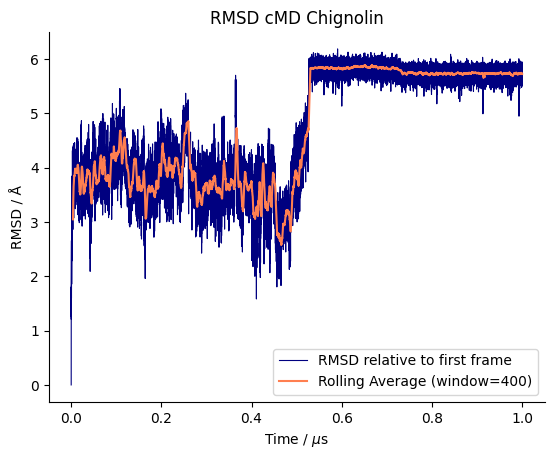

In [ ]:
rmsd_data = pd.read_csv("prot-rmsd-ca.dat",skiprows=1, names = ["Frame","RMSD"],sep="\s+")
xray_rmsd_data = pd.read_csv("rmsd-xray-ca.dat",skiprows=1, names = ["Frame","RMSD"],sep="\s+")

# chance the step size

num_frames = len(rmsd_data.loc[:,"Frame"])
print(num_frames)

time_per_step = 1 / num_frames

rmsd_data["Frame"] = rmsd_data["Frame"] * time_per_step




rolling_window = 400
rmsd_rolling_avg = rmsd_data.loc[:, "RMSD"].rolling(window=rolling_window).mean()
rmsd_xray_rolling_avg = xray_rmsd_data.loc[:, "RMSD"].rolling(window=rolling_window).mean()


# Plot original RMSD data
plt.plot(rmsd_data.loc[:, "Frame"], rmsd_data.loc[:, "RMSD"], label='RMSD relative to first frame', linewidth=0.8, color='navy')
#plt.plot(xray_rmsd_data.loc[:, "Frame"], xray_rmsd_data.loc[:, "RMSD"], label='RMSD relative XRay Structure', linewidth=0.8, color='dodgerblue')

# Plot rolling average
plt.plot(rmsd_data.loc[:, "Frame"], rmsd_rolling_avg, label=f'Rolling Average (window={rolling_window})', linewidth=1.5, color='coral')
#plt.plot(xray_rmsd_data.loc[:, "Frame"], rmsd_xray_rolling_avg, label=f'Rolling Average (window={rolling_window})', linewidth=1.5, color='gold')


# Add labels and legend
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc='best')
plt.xlabel('Time / $\mu$s')
plt.title("RMSD cMD Chignolin")
plt.ylabel('RMSD / \u212B')

# Show the plot
plt.savefig("rmsd_chignolin.png",dpi=700)
plt.show()


# RMSD aMD

200000


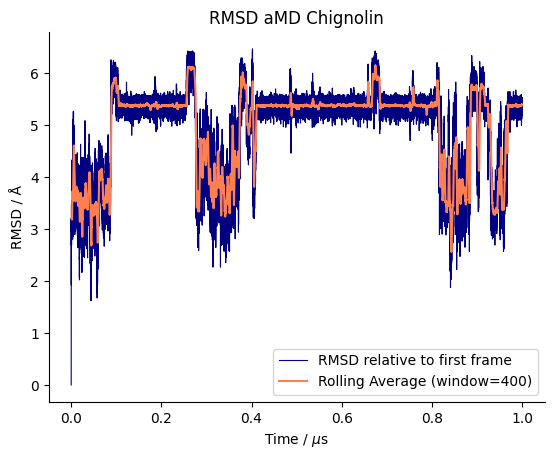

In [29]:
rmsd_data = pd.read_csv("prot-rmsd-ams-ca.dat",skiprows=1, names = ["Frame","RMSD"],sep="\s+")
xray_rmsd_data = pd.read_csv("rmsd-xray-ca.dat",skiprows=1, names = ["Frame","RMSD"],sep="\s+")

# chance the step size

num_frames = len(rmsd_data.loc[:,"Frame"])
print(num_frames)

time_per_step = 1 / num_frames

rmsd_data["Frame"] = rmsd_data["Frame"] * time_per_step




rolling_window = 400
rmsd_rolling_avg = rmsd_data.loc[:, "RMSD"].rolling(window=rolling_window).mean()
rmsd_xray_rolling_avg = xray_rmsd_data.loc[:, "RMSD"].rolling(window=rolling_window).mean()


# Plot original RMSD data
plt.plot(rmsd_data.loc[:, "Frame"], rmsd_data.loc[:, "RMSD"], label='RMSD relative to first frame', linewidth=0.8, color='navy')
#plt.plot(xray_rmsd_data.loc[:, "Frame"], xray_rmsd_data.loc[:, "RMSD"], label='RMSD relative XRay Structure', linewidth=0.8, color='dodgerblue')

# Plot rolling average
plt.plot(rmsd_data.loc[:, "Frame"], rmsd_rolling_avg, label=f'Rolling Average (window={rolling_window})', linewidth=1.5, color='coral')
#plt.plot(xray_rmsd_data.loc[:, "Frame"], rmsd_xray_rolling_avg, label=f'Rolling Average (window={rolling_window})', linewidth=1.5, color='gold')


# Add labels and legend
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc='best')
plt.xlabel('Time / $\mu$s')
plt.title("RMSD aMD Chignolin")
plt.ylabel('RMSD / \u212B')

# Show the plot
plt.savefig("rmsd_chignolin_amd.png",dpi=700)
plt.show()

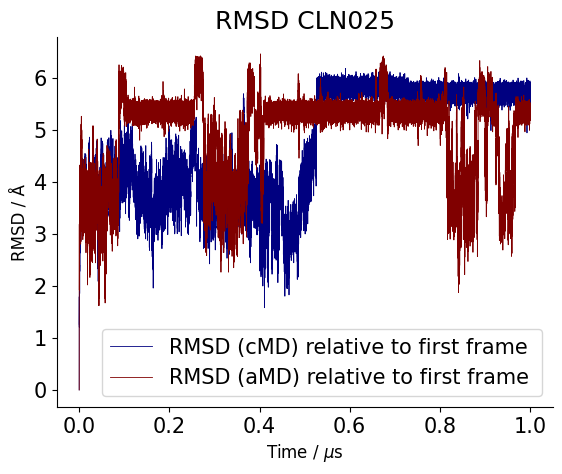

In [53]:
# combine both in one plot

import matplotlib as mpl

mpl.rcParams["font.size"] = 15
mpl.rcParams["axes.labelsize"] = 12

rmsd_data = pd.read_csv("prot-rmsd-ca.dat",skiprows=1, names = ["Frame","RMSD"],sep="\s+")
rmsd_data_amd = pd.read_csv("prot-rmsd-ams-ca.dat",skiprows=1, names = ["Frame","RMSD"],sep="\s+")



len_frames_cmd = len(rmsd_data.loc[:,"Frame"])
len_frames_amd = len(rmsd_data_amd.loc[:,"Frame"])

time_per_step_cmd = 1 / len_frames_cmd
time_per_step_amd = 1 / len_frames_amd

rmsd_data["Frame"] = rmsd_data["Frame"] * time_per_step_cmd

rmsd_data_amd["Frame"] = rmsd_data_amd["Frame"] * time_per_step_amd

rolling_window = 400
rmsd_rolling_avg = rmsd_data.loc[:, "RMSD"].rolling(window=rolling_window).mean()
rmsd_rolling_avg_amd = rmsd_data_amd.loc[:, "RMSD"].rolling(window=rolling_window).mean()

# Add labels and legend
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.plot(rmsd_data.loc[:, "Frame"], rmsd_data.loc[:, "RMSD"], label='RMSD (cMD) relative to first frame ', linewidth=0.6, color='navy')
plt.plot(rmsd_data_amd.loc[:, "Frame"], rmsd_data_amd.loc[:, "RMSD"], label='RMSD (aMD) relative to first frame', linewidth=0.6, color='maroon')

# Plot rolling average
#plt.plot(rmsd_data.loc[:, "Frame"], rmsd_rolling_avg, label=f'Rolling Average (cMD) (window={rolling_window})', linewidth=1, color='green')
#plt.plot(rmsd_data_amd.loc[:, "Frame"], rmsd_rolling_avg_amd, label=f'Rolling Average (aMD) (window={rolling_window})', linewidth=1, color='black')

plt.legend(loc='best')
plt.xlabel('Time / $\mu$s')
plt.title("RMSD CLN025")
plt.ylabel('RMSD / \u212B')

# Show the plot
plt.savefig("rmsd_comparison_both",dpi=700)
plt.show()



<ipython-input-59-0d33a9272818>:14: RuntimeWarning: divide by zero encountered in divide
  vlj = 4*epsilon*((sigma/r)**12 - (sigma/r)**6)
<ipython-input-59-0d33a9272818>:14: RuntimeWarning: invalid value encountered in subtract
  vlj = 4*epsilon*((sigma/r)**12 - (sigma/r)**6)
<ipython-input-59-0d33a9272818>:20: RuntimeWarning: divide by zero encountered in divide
  vcoul = k*q1*q2/r


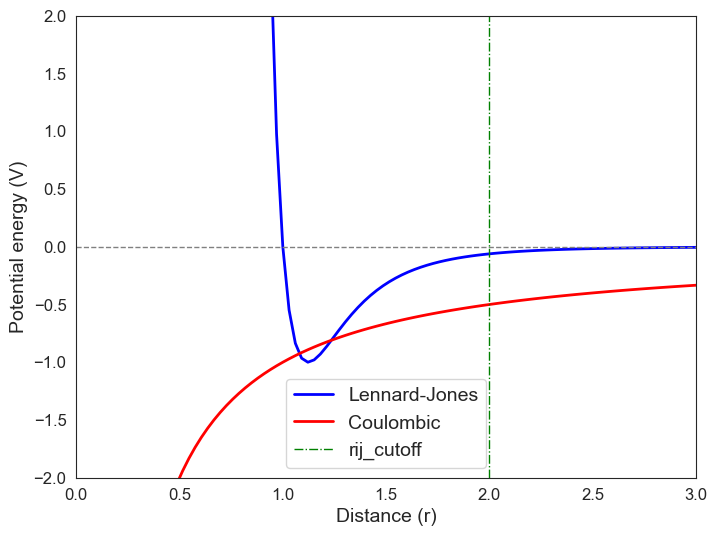

In [59]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_style("white")  # Change the style of the plot  

# Define the distance range and the cutoff
r = np.linspace(0, 3, 100) 
cutoff_r = 2  

# Lennard-Jones potential 
sigma = 1.0 
epsilon = 1.0 
vlj = 4*epsilon*((sigma/r)**12 - (sigma/r)**6)  

# Coulombic potential 
q1 = 1.0
q2 = -1.0
k = 1.0
vcoul = k*q1*q2/r  

# Create a plot 

fig, ax = plt.subplots(figsize=(8,6)) 
ax.plot(r, vlj, label="Lennard-Jones", lw = 2, color = "blue") 
ax.plot(r, vcoul, label="Coulombic", lw = 2, color = "red") 
ax.axhline(0, c='gray', ls = '--', lw = 1)  #horizontal line at the asymptote of Lennard-Jones 
ax.axvline(cutoff_r, c='green', ls = '-.', lw = 1, label='rij_cutoff') # vertical line at cutoff_r 
ax.set_xlabel("Distance (r)", fontsize=14) 
ax.set_ylabel("Potential energy (V)", fontsize=14) 
ax.legend(fontsize=14) 
ax.xaxis.set_tick_params(labelsize=12) 
ax.yaxis.set_tick_params(labelsize=12) 
ax.set_xlim(0,3) #to limit the x-axis range from 0 to 3 
ax.set_ylim(-2,2) #to limit the y-axis range plt.tight_layout() # improve the spacing between the plot and the labels 
plt.savefig("potentials_with_cutoff.png",dpi=700)
plt.show()